In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
score_df = pd.read_csv('final_student_assessment.csv')
score_df

,code_module,code_presentation,id_student,final_result,final_marks
0,AAA,2013J,11391,Pass,82.40
1,AAA,2013J,28400,Pass,65.40
2,AAA,2013J,30268,Withdrawn,0.00
3,AAA,2013J,31604,Pass,76.30
4,AAA,2013J,32885,Pass,55.00
...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.00
32589,GGG,2014J,2645731,Distinction,88.11
32590,GGG,2014J,2648187,Pass,76.67
32591,GGG,2014J,2679821,Withdrawn,91.50


In [5]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data = pd.merge(data, score_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,261,262,263,264,265,266,267,268,269,final_marks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.40
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76.30
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.11
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.67
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.50


In [6]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [7]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = X[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
    
    # Assessment score data
    score_cols = 'final_marks'
    X3 = X[score_cols]
    X3 = X3.to_numpy().reshape(-1,1)
        
    return X1, X2, X3

In [8]:
# prepare the data
X_train_clicks, X_train_demographics, X_train_score = prepare_data(X_train)
X_test_clicks, X_test_demographics, X_test_score = prepare_data(X_test)

# print stastic
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape, X_train_score.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape, X_test_score.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 43) (26074, 37) (26074, 1)
Test Data:  (6519, 43) (6519, 37) (6519, 1)
Train target count: Counter({0: 13766, 1: 12308})
Test target count: Counter({0: 3442, 1: 3077})


In [9]:
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [10]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import Sequential, Model

# Individual model

In [16]:
# Define model
clicks = Sequential()
clicks.add(Input(shape=(X_train_clicks.shape[1], )))
clicks.add(Dense(128, activation='relu'))
clicks.add(Dense(64, activation='relu'))
clicks.add(Dense(16, activation='relu'))
clicks.add(Dense(2, activation='sigmoid'))

demographic = Sequential()
demographic.add(Input(shape=(X_train_demographics.shape[1], )))
demographic.add(Dense(128, activation='relu'))
demographic.add(Dense(64, activation='relu'))
demographic.add(Dense(16, activation='relu'))
demographic.add(Dense(2, activation='sigmoid'))

assignmnet = Sequential()
assignmnet.add(Input(shape=(X_train_score.shape[1], )))
assignmnet.add(Dense(6, activation='relu'))
assignmnet.add(Dense(2, activation='sigmoid'))

In [17]:
# compile model
clicks.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
demographic.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
assignmnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

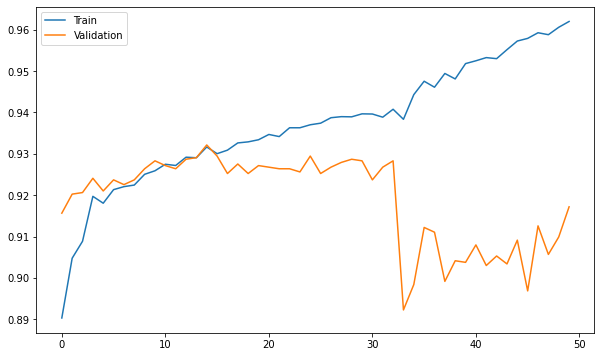

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3447
           1       0.89      0.89      0.89      3072

    accuracy                           0.89      6519
   macro avg       0.89      0.89      0.89      6519
weighted avg       0.89      0.89      0.89      6519



In [19]:
# model based on only clicks
hist1 = clicks.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=15, batch_size=10, verbose=0)
visualize_loss(hist1)

# predict
predict = clicks.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

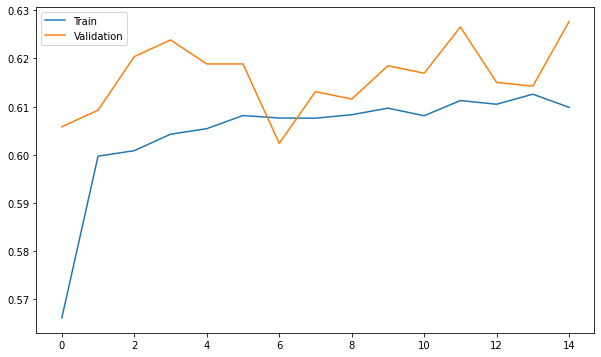

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      3397
           1       0.59      0.58      0.59      3122

    accuracy                           0.61      6519
   macro avg       0.61      0.61      0.61      6519
weighted avg       0.61      0.61      0.61      6519



In [20]:
# model based on only demographics
hist2 = demographic.fit(X_train_demographics, y_train_cat, validation_split=0.1, epochs=15, batch_size=10, verbose=0)
visualize_loss(hist2)

# predict
predict = demographic.predict(X_test_demographics)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

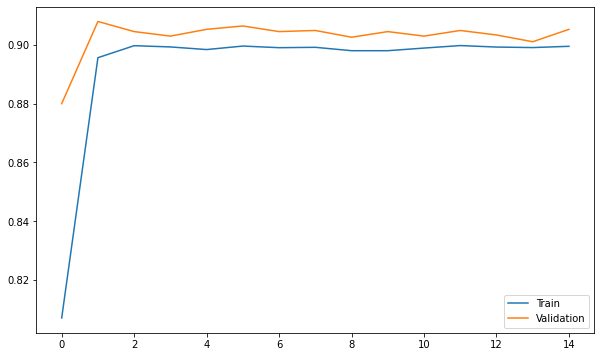

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3223
           1       0.93      0.87      0.90      3296

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



In [21]:
# model based on only assessment
hist3 = assignmnet.fit(X_train_score, y_train_cat, validation_split=0.1, epochs=15, batch_size=10, verbose=0)
visualize_loss(hist3)

# predict
predict = assignmnet.predict(X_test_score)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# combine all three models

In [27]:
# Define model
input1 = Input(shape=(X_train_clicks.shape[1], ))
x1 = Dense(128, activation='relu')(input1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(16, activation='relu')(x1)
x1 = Dense(4, activation='relu')(x1)


input2 = Input(shape=(X_train_demographics.shape[1], ))
x2 = Dense(128, activation='relu')(input2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(16, activation='relu')(x2)
x2 = Dense(4, activation='relu')(x2)


input3 = Input(shape=(X_train_score.shape[1], ))
x3 = Dense(4, activation='relu')(input3)
# x3 = Dense(3, activation='relu')(x3)

out4 = Add()([x1, x2, x3])
out = Dense(2, activation='sigmoid')(out4)
# out = Sig()(out4)

combine_model = Model(inputs=[input1, input2, input3], outputs=out)
print(combine_model.summary())
combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 43)]         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 37)]         0                                            
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 128)          5632        input_16[0][0]                   
__________________________________________________________________________________________________
dense_53 (Dense)                (None, 128)          4864        input_17[0][0]                   
____________________________________________________________________________________________

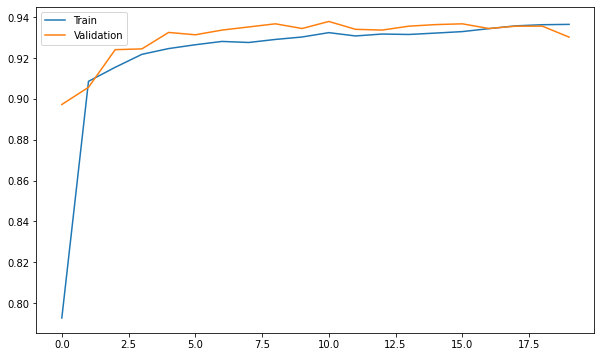

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3277
           1       0.95      0.90      0.92      3242

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



In [28]:
hist = combine_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0)
visualize_loss(hist)

predict = combine_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# this dataset is imbalance dataset, so lets compute the class weight and assign it to the model

In [61]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6313622935735387, 1: 0.878889001247177, 2: 3.5929447430067523}

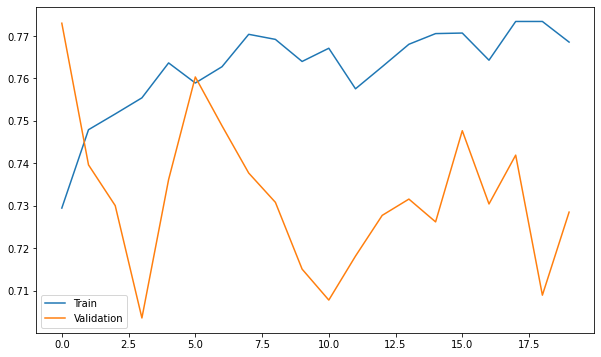

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4361
           1       0.65      0.74      0.69      2158
           2       0.00      0.00      0.00         0

    accuracy                           0.74      6519
   macro avg       0.53      0.49      0.50      6519
weighted avg       0.84      0.74      0.78      6519



/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
hist = combine_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, class_weight=class_weights)
visualize_loss(hist)

predict = combine_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# check for individial models

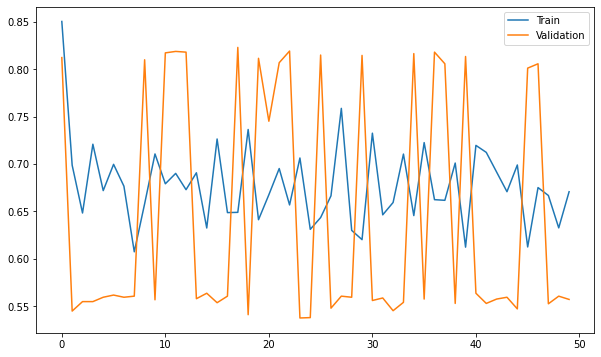

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3075
           1       0.00      0.43      0.01        21
           2       0.99      0.17      0.30      3423

    accuracy                           0.55      6519
   macro avg       0.62      0.53      0.41      6519
weighted avg       0.93      0.55      0.59      6519



In [62]:
# model based on only clicks
hist1 = clicks.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=50, batch_size=10, verbose=0,
                  class_weight=class_weights)
visualize_loss(hist1)

# predict
predict = clicks.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# Finding

- Using class weights for balancing the dataset is not helping 
- Using clicks data only gives 83% of accuracy
- combine model is not imporving the result

# LSTM model

In [29]:
# Convert the data into 3-dimensional
X_train_clicks = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

# convert data into 3-d
X_train_demographics = X_train_demographics.to_numpy().reshape(X_train_demographics.shape[0], X_train_demographics.shape[1], 1)
X_test_demographics = X_test_demographics.to_numpy().reshape(X_test_demographics.shape[0], X_test_demographics.shape[1], 1)

X_train_score = X_train_score.reshape(X_train_score.shape[0], X_train_score.shape[1], 1)
X_test_score = X_test_score.reshape(X_test_score.shape[0], X_test_score.shape[1], 1)

In [30]:
# Define the model
clicks_lstm = Sequential()
clicks_lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
# clicks_lstm.add(LSTM(50, activation='relu', return_sequences=True))
# clicks_lstm.add(LSTM(25, activation='relu', return_sequences=True))
clicks_lstm.add(LSTM(10, activation='relu', return_sequences=False))
clicks_lstm.add(Dense(2, activation='sigmoid'))

# compile the model
clicks_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
734/734 - 23s - loss: 20.2995 - accuracy: 0.4109 - val_loss: 1.2328 - val_accuracy: 0.5594
Epoch 2/20
734/734 - 18s - loss: 0.8850 - accuracy: 0.5472 - val_loss: 0.7665 - val_accuracy: 0.5341
Epoch 3/20
734/734 - 18s - loss: 0.7949 - accuracy: 0.5439 - val_loss: 0.7989 - val_accuracy: 0.5334
Epoch 4/20
734/734 - 18s - loss: 106.5383 - accuracy: 0.5650 - val_loss: 0.7681 - val_accuracy: 0.6495
Epoch 5/20
734/734 - 18s - loss: 0.7258 - accuracy: 0.6218 - val_loss: 0.6400 - val_accuracy: 0.6265
Epoch 6/20
734/734 - 18s - loss: 0.8116 - accuracy: 0.6295 - val_loss: 0.6301 - val_accuracy: 0.6633
Epoch 7/20
734/734 - 26s - loss: 0.7820 - accuracy: 0.5762 - val_loss: 0.6933 - val_accuracy: 0.5456
Epoch 8/20
734/734 - 19s - loss: 0.7211 - accuracy: 0.5977 - val_loss: 1.0190 - val_accuracy: 0.5219
Epoch 9/20
734/734 - 19s - loss: 0.6983 - accuracy: 0.5466 - val_loss: 0.6884 - val_accuracy: 0.5433
Epoch 10/20
734/734 - 22s - loss: 0.6945 - accuracy: 0.5386 - val_loss: 0.6926 - val_acc

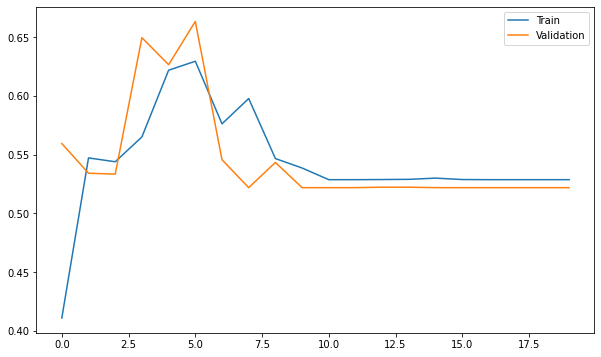

In [31]:
hist = clicks_lstm.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=20, batch_size=32, verbose=2)
visualize_loss(hist)

In [32]:
# predict
predict = clicks_lstm.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      6519
           1       0.00      0.00      0.00         0

    accuracy                           0.53      6519
   macro avg       0.50      0.26      0.35      6519
weighted avg       1.00      0.53      0.69      6519



# CNN base model

In [33]:
# define model
clicks_cnn = Sequential()
clicks_cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
clicks_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Flatten())
clicks_cnn.add(Dense(128,  activation='relu'))
clicks_cnn.add(Dense(64,  activation='relu'))
clicks_cnn.add(Dense(32,  activation='relu'))
clicks_cnn.add(Dense(2,  activation='sigmoid'))

# compile the model
clicks_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
734/734 - 3s - loss: 0.2653 - accuracy: 0.9125 - val_loss: 0.2219 - val_accuracy: 0.9264
Epoch 2/20
734/734 - 3s - loss: 0.2147 - accuracy: 0.9219 - val_loss: 0.2004 - val_accuracy: 0.9260
Epoch 3/20
734/734 - 3s - loss: 0.2084 - accuracy: 0.9241 - val_loss: 0.2036 - val_accuracy: 0.9268
Epoch 4/20
734/734 - 3s - loss: 0.2047 - accuracy: 0.9246 - val_loss: 0.1923 - val_accuracy: 0.9279
Epoch 5/20
734/734 - 3s - loss: 0.2021 - accuracy: 0.9252 - val_loss: 0.1918 - val_accuracy: 0.9275
Epoch 6/20
734/734 - 3s - loss: 0.1992 - accuracy: 0.9267 - val_loss: 0.2002 - val_accuracy: 0.9206
Epoch 7/20
734/734 - 4s - loss: 0.1980 - accuracy: 0.9255 - val_loss: 0.1967 - val_accuracy: 0.9233
Epoch 8/20
734/734 - 4s - loss: 0.1949 - accuracy: 0.9279 - val_loss: 0.1937 - val_accuracy: 0.9252
Epoch 9/20
734/734 - 3s - loss: 0.1914 - accuracy: 0.9277 - val_loss: 0.1930 - val_accuracy: 0.9294
Epoch 10/20
734/734 - 3s - loss: 0.1891 - accuracy: 0.9293 - val_loss: 0.1974 - val_accuracy: 0.9302

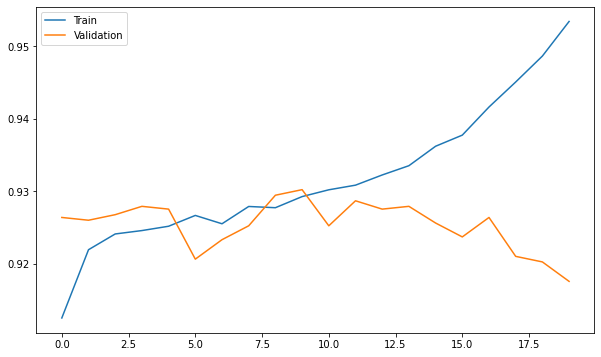

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'best_model.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

hist = clicks_cnn.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=20, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [35]:
# predict
predict = clicks_cnn.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3275
           1       0.93      0.88      0.90      3244

    accuracy                           0.91      6519
   macro avg       0.91      0.91      0.91      6519
weighted avg       0.91      0.91      0.91      6519



In [36]:
# load best model
clicks_cnn.load_weights(path)
predict = clicks_cnn.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3153
           1       0.96      0.88      0.92      3366

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



# combine model based on cnn

In [37]:
# define model

input1 = Input(shape=(X_train_clicks.shape[1], 1))
out1 = Conv1D(32, kernel_size=2, activation='relu')(input1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(64, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(128, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Flatten()(out1)
out1 = Dense(128,  activation='relu')(out1)
out1 = Dense(64,  activation='relu')(out1)
out1 = Dense(32,  activation='relu')(out1)
out1 = Dense(2,  activation='relu')(out1)


input2 = Input(shape=(X_train_demographics.shape[1], 1))
out2 = Conv1D(8, kernel_size=2, activation='relu')(input2)
out2 = AveragePooling1D(2)(out2)
out2 = Conv1D(16, kernel_size=2, activation='relu')(out2)
out2 = AveragePooling1D(2)(out2)
out2 = Flatten()(out2)
out2 = Dense(64,  activation='relu')(out2)
out2 = Dense(32,  activation='relu')(out2)
out2 = Dense(2,  activation='relu')(out2)

input3 = Input(shape=(X_train_score.shape[1], 1))
out3 = Conv1D(2, kernel_size=1, activation='relu')(input3)
out3 = Flatten()(out3)


out4 = Add()([out1, out2, out3])
out = Softmax()(out4)

combine_cnn_model = Model(inputs=[input1, input2, input3], outputs=out)

# compile the model
combine_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
734/734 - 4s - loss: 1.2519 - accuracy: 0.8949 - val_loss: 0.8477 - val_accuracy: 0.9195
Epoch 2/10
734/734 - 4s - loss: 0.8078 - accuracy: 0.9158 - val_loss: 0.7618 - val_accuracy: 0.9306
Epoch 3/10
734/734 - 3s - loss: 0.7004 - accuracy: 0.9145 - val_loss: 0.6417 - val_accuracy: 0.9268
Epoch 4/10
734/734 - 4s - loss: 0.5869 - accuracy: 0.9155 - val_loss: 0.4504 - val_accuracy: 0.9245
Epoch 5/10
734/734 - 5s - loss: 0.3831 - accuracy: 0.9173 - val_loss: 0.2585 - val_accuracy: 0.9310
Epoch 6/10
734/734 - 3s - loss: 0.2151 - accuracy: 0.9233 - val_loss: 0.1663 - val_accuracy: 0.9321
Epoch 7/10
734/734 - 3s - loss: 0.1758 - accuracy: 0.9276 - val_loss: 0.1718 - val_accuracy: 0.9317
Epoch 8/10
734/734 - 3s - loss: 0.1735 - accuracy: 0.9286 - val_loss: 0.1649 - val_accuracy: 0.9348
Epoch 9/10
734/734 - 3s - loss: 0.1713 - accuracy: 0.9297 - val_loss: 0.1644 - val_accuracy: 0.9367
Epoch 10/10
734/734 - 3s - loss: 0.1716 - accuracy: 0.9287 - val_loss: 0.1672 - val_accuracy: 0.9325

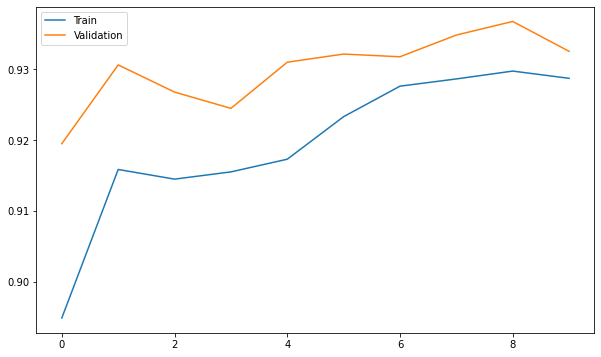

In [38]:
hist = combine_cnn_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [39]:
# predict
predict = combine_cnn_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3132
           1       0.97      0.88      0.92      3387

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



In [40]:
# predict
combine_cnn_model.load_weights(path)
predict = combine_cnn_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3265
           1       0.95      0.90      0.92      3254

    accuracy                           0.92      6519
   macro avg       0.93      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



# Exclude demographics

In [41]:
# define model

input1 = Input(shape=(X_train_clicks.shape[1], 1))
out1 = Conv1D(32, kernel_size=2, activation='relu')(input1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(64, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(128, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Flatten()(out1)
out1 = Dense(128,  activation='relu')(out1)
out1 = Dense(64,  activation='relu')(out1)
out1 = Dense(32,  activation='relu')(out1)
out1 = Dense(6,  activation='relu')(out1)


input3 = Input(shape=(X_train_score.shape[1], 1))
out3 = Conv1D(6, kernel_size=1, activation='relu')(input3)
out3 = Flatten()(out3)


out4 = Add()([out1, out3])
out = Dense(2, activation='sigmoid')(out4)

combine_cnn_model = Model(inputs=[input1, input3], outputs=out)

# compile the model
combine_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
734/734 - 3s - loss: 1.2879 - accuracy: 0.7573 - val_loss: 0.4251 - val_accuracy: 0.8762
Epoch 2/10
734/734 - 3s - loss: 0.3880 - accuracy: 0.9070 - val_loss: 0.3295 - val_accuracy: 0.9294
Epoch 3/10
734/734 - 3s - loss: 0.3138 - accuracy: 0.9217 - val_loss: 0.2674 - val_accuracy: 0.9279
Epoch 4/10
734/734 - 4s - loss: 0.2637 - accuracy: 0.9261 - val_loss: 0.2294 - val_accuracy: 0.9333
Epoch 5/10
734/734 - 5s - loss: 0.2287 - accuracy: 0.9291 - val_loss: 0.2021 - val_accuracy: 0.9356
Epoch 6/10
734/734 - 3s - loss: 0.2046 - accuracy: 0.9292 - val_loss: 0.1868 - val_accuracy: 0.9333
Epoch 7/10
734/734 - 3s - loss: 0.1914 - accuracy: 0.9313 - val_loss: 0.2085 - val_accuracy: 0.9302
Epoch 8/10
734/734 - 3s - loss: 0.1839 - accuracy: 0.9317 - val_loss: 0.1728 - val_accuracy: 0.9352
Epoch 9/10
734/734 - 3s - loss: 0.1762 - accuracy: 0.9313 - val_loss: 0.1722 - val_accuracy: 0.9314
Epoch 10/10
734/734 - 3s - loss: 0.1686 - accuracy: 0.9315 - val_loss: 0.1586 - val_accuracy: 0.9363

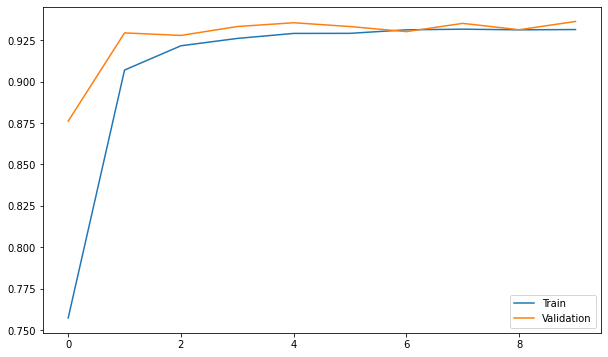

In [42]:
hist = combine_cnn_model.fit([X_train_clicks, X_train_score], y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [43]:
# predict
predict = combine_cnn_model.predict([X_test_clicks, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3196
           1       0.96      0.89      0.92      3323

    accuracy                           0.92      6519
   macro avg       0.93      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



In [44]:
# predict
combine_cnn_model.load_weights(path)
predict = combine_cnn_model.predict([X_test_clicks, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

ValueError: You are trying to load a weight file containing 13 layers into a model with 9 layers.